# **Agricultural Exports Categories Analysis**
*by Sergio Postigo and Víctor Diví*

## **1. Introduction**
Many countries base a big portion of their economies in foreign trade. Therefore, the customs agencies around the world collect data about every imported/exported good that passed across their ports, airports, borders, etc. In some countries, this data is open, and anyone can access to it to analyze it and make more informed decisions while importing or exporting goods. However, this data demands some challenges before its use. One of them is the labelling. For example, in Peru every time a good is imported/exported, a customs agent fills a form with the information of the product(s), where they include descriptions about it. Nonetheless, there isn´t a proper labelling, for instance in case we wanted to aggregate amounts imported/exported by category.

The labelling for goods is done manually mainly by consultancy agencies, who get this data to generate analytics reports for companies and institutions interested in foreign trade information of specific products. They usually use MS Excel spreadsheets to perform the labeling, which is not efficient and takes much time. We want to address this pain by automatizing the labelling process using Machine Learning.

## **2. Data Wrangling**
The data was provided from a consultancy company in Peru called RTM. They were hired by an agricultural exports company who were interested in knowing which categories of products were exported from Peru from 2017 till 2021. RTM adquired the data from the company Veritrade, who consolidate foreign trade databases from many conuntries in South America. 

RTM provided us the data in .xlsx format. We converted it into CSV (using Excel) and then proceed to import it into this notebook as DataFrame with the Pandas library. 

In [276]:
# Import Pandas library
import pandas as pd

In [322]:
# Convert the CSV data into Dataframe
data =  pd.read_csv("../data/raw_data/data.csv", encoding='latin-1', sep=';')
data.head()

C:\Users\spost\AppData\Local\Temp\ipykernel_19048\3000482193.py:2: DtypeWarning: Columns (6,14,16,22,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  data =  pd.read_csv("../data/raw_data/data.csv", encoding='latin-1', sep=';')


,Partida Aduanera,Descripcion de la Partida Aduanera,Aduana,DUA,Fecha,Año,Cod. Tributario,Exportador en Perú,Importador Extranjero,Kg Bruto,...,Descripcion5,Naviera,Agente Carga(Origen),Agente Carga(Destino),Canal,Concatenar,Categoría macro Aurum,Subcategoría inicial,Subcategoría Consolidada Aurum,Categoría Consolidada Aurum
0,711200000,"ACEITUNA CONSERVADAS PROVISIONALMENTE,TODAVIA ...",MARITIMA DEL CALLAO,114358 | 1,11/19/2019,2019,20505580291,Cultivares Sac,Comercial Agricola Montoliva Ltda.,"14302,53",...,RESTITUCION DERECHOS ARANC. (COD 13),NaN,NaN,NaN,NaN,ACEITUNAS ARAUCO PRESENTACION EN BIDONES RESTI...,Aceituna,Aceitunas Arauco,Otras Variedades De Aceituna,Aceituna
1,711200000,"ACEITUNA CONSERVADAS PROVISIONALMENTE,TODAVIA ...",MARITIMA DEL CALLAO,017611 | 1,2/21/2019,2019,20505580291,Cultivares Sac,Comercial Agricola Montoliva Ltda.,"10686,93",...,RESTITUCION DERECHOS ARANC. (COD 13),YANGMING MARINE TRANSPORT CORP,NEW FORWARDING SOCIEDAD ANONIMA CERRADA,MAC-KAY CARGO LTDA RUT: 76.242.137-,NaN,ACEITUNAS ARAUCO PRESENTACION EN BIDONES VERDE...,Aceituna,Aceitunas Arauco,Otras Variedades De Aceituna,Aceituna
2,711200000,"ACEITUNA CONSERVADAS PROVISIONALMENTE,TODAVIA ...",MARITIMA DEL CALLAO,102610 | 11,10/16/2018,2018,20514935328,Oasis Olives S.A.C.,Oasis Fine Foods Pty Ltd,"584,16",...,NaN,PACIFIC INTERNATIONAL LINES,NaN,NaN,NaN,4 BIDONES ACEITUNA DE MESA ASCOLANA VERDE DESH...,Aceituna,Aceitunas Ascolana,Otras Variedades De Aceituna,Aceituna
3,709920000,ACEITUNAS,MARITIMA DEL CALLAO,059623 | 3,7/5/2018,2018,20342015108,Agroindustrias Nobex S.A.,Chains Trading Company Ltd.,"2696,51",...,SE ACOGE A RESTITUCION DE DERECHOS ARANCELARIO...,HAPAG-LLOYD A G,NaN,NaN,NaN,ACEITUNA ASCOLANA ENTERA 07-09 BID80L 58KG C/B...,Aceituna,Aceitunas Ascolana,Otras Variedades De Aceituna,Aceituna
4,711200000,"ACEITUNA CONSERVADAS PROVISIONALMENTE,TODAVIA ...",MARITIMA DEL CALLAO,114358 | 2,11/19/2019,2019,20505580291,Cultivares Sac,Comercial Agricola Montoliva Ltda.,"3558,25",...,RESTITUCION DERECHOS ARANC. (COD 13),NaN,NaN,NaN,NaN,ACEITUNA ASCOLANO PRESENTACION EN BIDONES REST...,Aceituna,Aceitunas Ascolana,Otras Variedades De Aceituna,Aceituna


Since we don't have a separated training data source, we will split the data available into training and testing data

In [278]:
from sklearn.model_selection import train_test_split

# We use 20% of the data to test and 80% to train
train, test = train_test_split(data, test_size=0.2, random_state=5)

## **3. Exploratory Data Analysis**

Let's first describe the columns of the table

In [279]:
# Get all the columns
train.columns

Index(['Partida Aduanera', 'Descripcion de la Partida Aduanera', 'Aduana',
       'DUA', 'Fecha', 'Año', 'Cod. Tributario', 'Exportador en Perú',
       'Importador Extranjero', 'Kg Bruto', 'Kg Neto', 'Toneladas Netas',
       'Qty 1', 'Und 1', 'Qty 2', 'Und 2', 'U$ FOB Tot',
       'Miles de USD Fob TOTAL', 'U$ FOB Und 1', 'U$ FOB Und 2',
       'Pais de Destino', 'Puerto de destino', 'Último Puerto Embarque', 'Via',
       'Agente Portuario', 'Agente de Aduana', 'Descripcion Comercial',
       'Descripcion1', 'Descripcion2', 'Descripcion3', 'Descripcion4',
       'Descripcion5', 'Naviera', 'Agente Carga(Origen)',
       'Agente Carga(Destino)', 'Canal', 'Concatenar', 'Categoría macro Aurum',
       'Subcategoría inicial', 'Subcategoría Consolidada Aurum',
       'Categoría Consolidada Aurum'],
      dtype='object')

1. Partida Aduanera: Specific code of a product included in the Harmonized System of the World Customs Organization (WCO)

2. Descripcion de la Partida Aduanera: Description about the product associated with the customs code

3. Aduana: Customs office from which the export was performed

4. DUA:  Single Administrative Document, it is a document that gathers information about the shipping

5. Fecha: Shipping date

6. Año: Shipping year

7. Cod. Tributario: Tax code of the company exporting the good

8. Exportador en Perú: Company or entity exporting the good

9. Importador Extranjero: Company or entity importing the good

10. Kg Bruto: Weight of the good in kg, including the weight of the container or box

11. Kg Neto: Weight of good in kg, excluding the weight of the container or box

12. Toneladas Netas: Weight of good in tons, excluding the weight of the container or box

13. Qty 1: Quantity of the good in terms of a specific measurement unit (1)

14. Und 1: Unit of measurement (1)

15. Qty 2: Quantity of the good in terms of a specific measurement unit (2)

16. Und 2:  Unit of measurement (2)

17. U$ FOB Tot: The value of the goods at the exporter's customs frontier in USD

18. Miles de USD Fob TOTAL: The value of the goods at the exporter's customs frontier in thousands of USD

19. U$ FOB Und 1: The value of the goods by unity (1)

20. U$ FOB Und 2: The value of the goods by unity (2)

21. Pais de Destino: Country of destiny

22. Puerto de destino: Port of destiny

23. Último Puerto Embarque: Last port of shipment

24. Via: Via (air, see, maritime)

25. Agente Portuario: Port agent

26. Agente de Aduana: Customs agent

27. Descripcion Comercial: Commercial description of the good

28. Descripcion1: Commercial description portion 1

29. Descripcion2: Commercial description portion 2

30. Descripcion3: Commercial description portion 3

31. Descripcion4: Commercial description portion 4

32. Descripcion5: Commercial description portion 5

33. Naviera: Shipping company

34. Agente Carga(Origen): Load Agent (origin)

35. Agente Carga(Destino): Load Agent (destiny)

36. Canal: Selectivity channe. Type of control that the Customs Service will carry out on the merchandise to be exported. There are three channels: Green, Orange and Red

37. Concatenar: Column that concatenates 27, 28, 29, 30, 31, 32

38. Categoría macro Aurum: Designated category/label

39. Subcategoría inicial: Designated subcategories/sub-lables

40. Subcategoría Consolidada Aurum:  Designated subcategories/sub-lables (with less granularity, it groups some sub-categories in "others")

41. Categoría Consolidada Aurum: Designated category/label (with less granularity, it groups some categories in "others")

#### **Remark 1:**

All posible categories all labeled in *Categoria macro Aurum* and all possible subcategories are labelled in *Subcategoria inicial*. Aurum grouped some of the categories in *Categoria consolidada Aurum* as "others" and did the same in *Subcategoría Consolidada Aurum* for the subcategories. This last two columns were very likely a requirement frem their client. He may have been interested specially in a list of categories and the rest were simply labeled as "others". However, what is from interest from us are the colums with all the categories and all the subcategories (*Categoria macro Aurum* and *Subcategoria inicial*). <br>

**Since the categories can be mapped from the subcategories, the model(s) to work on should predict the subcategories that are in the column *Subcategria inicial***

Let's analyze the distribution of the target class: *Subcategoría inicial*

Check unique values 

In [280]:
print(train['Subcategoría inicial'].nunique())

648


Check count of appearances of each class

In [281]:
train['Subcategoría inicial'].value_counts()

Espárrago Fresco                                                                           89306
Palta Hass                                                                                 39591
Palta Fresca Sin Variedad Especificada                                                     34255
Arándanos Frescos Sin Variedad                                                             32637
Uvas No Identificadas                                                                      32551
                                                                                           ...  
Acineta (Orquídea)                                                                             1
Leatris                                                                                        1
Arándanos Frescos Ventura - Snowchaser - Rojos - Springhigh                                    1
Arándanos Frescos Biloxi - Ventura - Sekoya - Victoria                                         1
Arándanos Frescos Ventura - Em

As seen, there is an important class imbalance. Let's show this in an histogram

<AxesSubplot:>

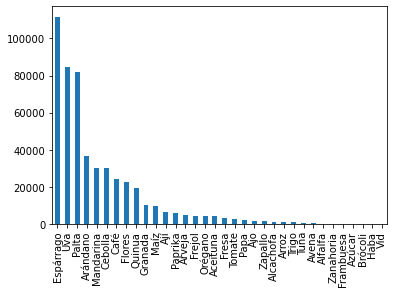

In [282]:
# Take the first 75 rows
train['Categoría macro Aurum'].value_counts().plot(kind='bar')

By analyzing the first 75 rows we can see that there is already an important class unbalance

#### **Remark 2:**

 *Descripcion1*, *Descripcion2*, *Descripcion3*, *Descripcion4* and *Descripcion5* concatenaded build *Descripcion Comercial*

In [283]:
# Replace NaN values with ''
train.fillna('', inplace=True)

# Concatenate Descripcion1, Descripcion2, Descripcion3, Descripcion4 and Descripcion5 and save the string in column "train"
train['Concatenated_Descriptions'] = train['Descripcion1'] + ' ' + train['Descripcion2'] + ' ' + train['Descripcion3'] + ' ' + train['Descripcion4'] + ' ' + train['Descripcion5']

# Remove spaces before and after the string
train['Concatenated_Descriptions'] = train['Concatenated_Descriptions'].str.strip()

# Compare "Descripcion Comercial" and "train"
train['Equal?'] = train['Descripcion Comercial'] == train['Concatenated_Descriptions']

# Print the comparison
temp_df = train[['Descripcion Comercial', 'Concatenated_Descriptions', 'Equal?']]
temp_df

,Descripcion Comercial,Concatenated_Descriptions,Equal?
541490,UVAS FRESCAS EN CAJAS VARIEDAD: IFG ELEVEN COL...,UVAS FRESCAS EN CAJAS VARIEDAD: IFG ELEVEN COL...,True
102488,CEBOLLAS FRESCASEN SACOS DE 46 KGPARA SU COMER...,CEBOLLAS FRESCASEN SACOS DE 46 KGPARA SU COMER...,True
201853,ESPARRAGOS FRESCOS CODIGO Nº13 RESTITUCION...,ESPARRAGOS FRESCOS CODIGO Nº13 RESTITUCION...,True
215653,ESPARRAGOS FRESCOS EN CAJAS DRAWBACK ESPARRA...,ESPARRAGOS FRESCOS EN CAJAS DRAWBACK ESPARRA...,False
312016,MANDARINAS FRESCAS TANGO COLD TREATMENT EXPOR...,MANDARINAS FRESCAS TANGO COLD TREATMENT EXPOR...,True
...,...,...,...
558088,"UVAS FRESCAS,VARIEDAD: SWEET GLOBE,CONDICION: ...","UVAS FRESCAS,VARIEDAD: SWEET GLOBE,CONDICION: ...",True
124605,CEBOLLA FRESCA ROJAEMBALADA EN SACOS(653 SACOS...,CEBOLLA FRESCA ROJAEMBALADA EN SACOS(653 SACOS...,True
544751,UVAS FRESCAS EN CAJAS VARIEDAD SUGRAONE COLD T...,UVAS FRESCAS EN CAJAS VARIEDAD SUGRAONE COLD T...,True
18638,ARANDANO FRESCO EN CAJAS SE ACOGE AL DRAWBACK,ARANDANO FRESCO EN CAJAS SE ACOGE AL DRAWBACK,True


In [284]:
# Check if all are equal
print("From "+str(temp_df[["Equal?"]].describe().values[0][0])+" rows, *Descripcion Comercial* and the *Concatenated_Descriptions* are equal in "+str(temp_df[["Equal?"]].describe().values[3][0])+".")

From 505115 rows, *Descripcion Comercial* and the *Concatenated_Descriptions* are equal in 477143.


In [285]:
temp_df[temp_df['Equal?']==False]

,Descripcion Comercial,Concatenated_Descriptions,Equal?
215653,ESPARRAGOS FRESCOS EN CAJAS DRAWBACK ESPARRA...,ESPARRAGOS FRESCOS EN CAJAS DRAWBACK ESPARRA...,False
293228,MANDARINAS FRESCAS EN CAJAS CONSUMO HUMANO / V...,MANDARINAS FRESCAS EN CAJAS CONSUMO HUMANO / V...,False
324782,MANDARINA SECA S. OWARI EN SACOS INDUSTRIA FAR...,MANDARINA SECA S. OWARI EN SACOS INDUSTRIA FAR...,False
440601,QUINUA BLANCA ORGANICA BOLSAS DE PAPEL DE 25 K...,QUINUA BLANCA ORGANICA BOLSAS DE PAPEL DE 25 K...,False
170210,ESPARRAGO FRESCO EN CAJAS DRAWBACK ESPARRAGO ...,ESPARRAGO FRESCO EN CAJAS DRAWBACK ESPARRAGO ...,False
...,...,...,...
547092,UVA DE MESA - FLAME SEEDLESS SUPERIOR CONSUMO ...,UVA DE MESA - FLAME SEEDLESS SUPERIOR CONSUMO ...,False
466620,UVAS FRESCAS EN CAJAS / VARIEDAD CRIMSON CONSU...,UVAS FRESCAS EN CAJAS / VARIEDAD CRIMSON CONSU...,False
456887,QUINUA TRICOLOR ORGANICA EN BOLSAS DE PAPEL DE...,QUINUA TRICOLOR ORGANICA EN BOLSAS DE PAPEL DE...,False
394051,PALTA FRESCA VARIEDAD: HASS EN CAJAS DE 4KG C/...,PALTA FRESCA VARIEDAD: HASS EN CAJAS DE 4KG C/...,False


Let's check what happens in a row where *Equal?* is false

In [286]:
# Descrpicion Comercial
print(temp_df.iloc[215653]['Descripcion Comercial'])
# Concatenated_Descriptions
print(temp_df.iloc[215653]['Concatenated_Descriptions'])

ARANDANOS FRESCOS   EN CAJAS DE 2.04 KG. DRAWBACK
ARANDANOS FRESCOS   EN CAJAS DE 2.04 KG. DRAWBACK


It seems that when trimming the column *Descripcion Comercial* into *Description* 1,2,3,4 and 5, Veritrade removed some characters, in this case some white spaces. That is why when we reconstruct the *Concatenated_Descriptions* from *Description* 1,2,3,4 and 5 we don´t get the exactly same string as in *Descripcion Comercial*.

Additionally, we can make an additional remark here: *Descripcion Comercial* has repeated sentences in it´s values, as is showed in the example above. This must be cleaned

In [287]:
# Remove the columns used to explain this remark
train.drop(columns=['Concatenated_Descriptions', 'Equal?'], inplace=True)

#### **Remark 3:**

The column *Concatenar* concatenates *Descripcion Comercial* and *Descripcion1*, *2,3,4* and *5*. Thus, it basically has a concatenation of two times the string from *Descripcion Comercial*. It seems that the consultants didn´t know that *Descripcion1*, *2,3,4* and *5* are trims of *Descripcion Comercial*. Maybe they thought this extra columns contained additional information and that is why they decided to concatenate everything in the "Concatenar" column to then process the information from here.

#### **Remark 4:**

For each *Partida aduanera* there is only one possible *Descripcion de la partida aduanera*.

In [288]:
# Create a temporal dataframe 
temp_df = train[["Partida Aduanera", "Descripcion de la Partida Aduanera"]].copy()
# Remove duplicated rows
temp_df.drop_duplicates(inplace=True)
# Get the number of rows
print("The number of all combinations of the columns *Partida Aduanera* and *Descripcion de la Partida Aduanera* are "+str(temp_df.shape[0]))
# Get the number of unique values of *Partida Aduanera*
print("The number of unique values of the column *Partida Aduanera* is "+str(temp_df['Partida Aduanera'].nunique()))
# Get the number of unique values of *Descripcion de la Partida Aduanera*
print("The number of unique values of the column *Descripcion de la Partida Aduanera* is "+str(temp_df['Descripcion de la Partida Aduanera'].nunique()))
temp_df

The number of all combinations of the columns *Partida Aduanera* and *Descripcion de la Partida Aduanera* are 209
The number of unique values of the column *Partida Aduanera* is 209
The number of unique values of the column *Descripcion de la Partida Aduanera* is 191


,Partida Aduanera,Descripcion de la Partida Aduanera
541490,806100000,UVAS FRESCAS
102488,703100000,"CEBOLLAS Y CHALOTES, FRESCOS O REFRIGERADOS"
201853,709200000,"ESPARRAGOS, FRESCOS O REFRIGERADOS"
312016,805299000,LAS DEMÁS CLEMENTINAS
131080,710801000,ESPÁRRAGOS
...,...,...
59089,710210000,"ARVEJAS(GUISANTES,CHICHAROS)(PISUM SATIVUM),AU..."
586617,1212920000,ALGARROBAS
521818,809100000,"DAMASCOS (ALBARICOQUES, CHABACANOS) FRESCOS"
340635,805400000,"TORONJAS O POMELOS, FRESCOS O SECOS"


There are some values of *Descripcion de la partida aduanera* that correspond to multiple values of *Partida Aduanera*

In [289]:
# Get the values of *Descripcion de la Partida Aduanera* that are related to multiple values of *Partida Aduanera*
temp_df[temp_df.duplicated(['Descripcion de la Partida Aduanera'], keep=False)].sort_values(by=['Descripcion de la Partida Aduanera'])

,Partida Aduanera,Descripcion de la Partida Aduanera
584225,603199000,"LAS DEMÁS FLORES Y CAPULLOS, CORTADOS PARA RAM..."
127768,603129000,"LAS DEMÁS FLORES Y CAPULLOS, CORTADOS PARA RAM..."
128235,603149000,"LAS DEMÁS FLORES Y CAPULLOS, CORTADOS PARA RAM..."
600061,713359000,LAS DEMÁS HORTALIZAS (INCLUSO SILVESTRES) DE V...
601236,713349000,LAS DEMÁS HORTALIZAS (INCLUSO SILVESTRES) DE V...
601225,713609000,LAS DEMÁS HORTALIZAS (INCLUSO SILVESTRES) DE V...
623905,904211090,LAS DEMÁS PIMIENTA DEL GÉNERO PIPER; FRUTOS DE...
589941,904219000,LAS DEMÁS PIMIENTA DEL GÉNERO PIPER; FRUTOS DE...
591649,904229000,LAS DEMÁS PIMIENTA DEL GÉNERO PIPER; FRUTOS DE...
440601,1008509000,"LOS DEMÁS ALFORFÓN, MIJO Y ALPISTE; LOS DEMÁS ..."


This is very likely an error in the customs agency systems, we will have to deal with it

#### **Remark 5:**

Since we are dealing with agricultural items, we can presume that there is an seasonal influence in the dates in which they are exported. Let's test this assumption

We will compare the *Partida aduanera* with the date column names *Fecha*

In [290]:
# Get the columns *Partida Aduanera* and *Fecha*
temp_df = train[["Partida Aduanera", "Fecha"]].copy()
# Cast the column of date (*Fecha*) to datetime
temp_df['Fecha'] = pd.to_datetime(temp_df['Fecha'], format='%m/%d/%Y')
# Count the exports by date
temp_df['Count of exports'] = temp_df.groupby(['Partida Aduanera','Fecha'])['Fecha'].transform('count')
temp_df.drop_duplicates(inplace=True)
# Sort the dataframe
temp_df.sort_values(by=['Partida Aduanera', 'Fecha'])

,Partida Aduanera,Fecha,Count of exports
457891,603110000,2017-01-03,2
458366,603110000,2017-01-04,2
458374,603110000,2017-01-06,1
457824,603110000,2017-01-10,1
458367,603110000,2017-01-17,2
...,...,...,...
61077,2101300000,2020-01-22,1
65633,2101300000,2020-08-18,1
61056,2101300000,2020-11-11,1
60064,2101300000,2021-02-11,1


Sample randomly some values of "Partida Aduanera" to plot

In [291]:
# Import random library
import random

# Number of samples
samples_qty = 6
# Get samples from *Partida Aduanera* (without repetitions)
samples = random.sample(list(dict.fromkeys(temp_df['Partida Aduanera'].tolist())), samples_qty)
print("The random selected values from *Partida Aduanera* are: ")
print(samples)
# Create a list with the dataframes of each sample
samples_dfs = []
for sample in samples:
    samples_dfs.append(temp_df[temp_df['Partida Aduanera'] == sample ].sort_values(by=["Partida Aduanera", "Fecha"])[['Fecha', 'Count of exports']])
# For each dataframe, populate the missing dates (imputing values of 0 for Count of exports)
populated_samples_dfs =[]
for sample_df in samples_dfs:
    dates = pd.date_range(sample_df['Fecha'].min(),sample_df['Fecha'].max())
    sample_df.set_index('Fecha', inplace=True)
    sample_df = sample_df.reindex(dates, fill_value=0) #this cant be done inplace
    populated_samples_dfs.append(sample_df) 


The random selected values from *Partida Aduanera* are: 
[1101000000, 810909000, 1208900000, 1108130000, 1102200000, 1209210000]


Let's plot all the selected samples

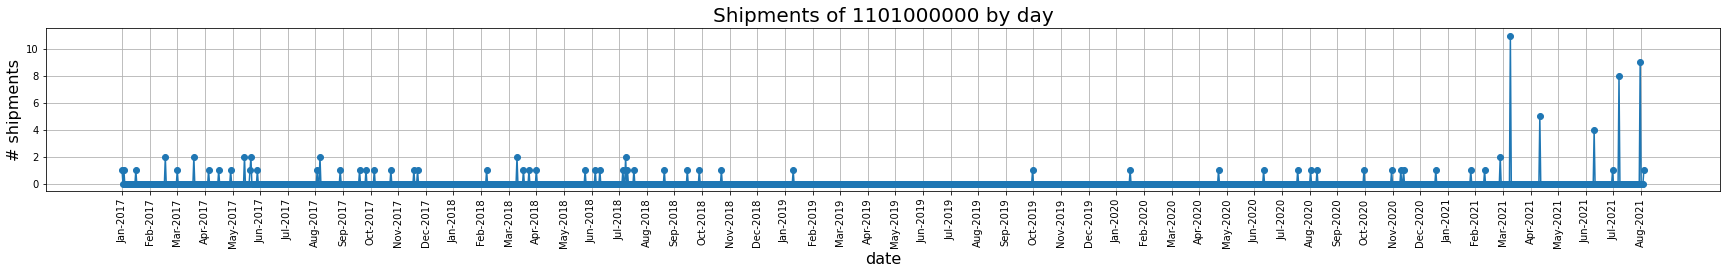

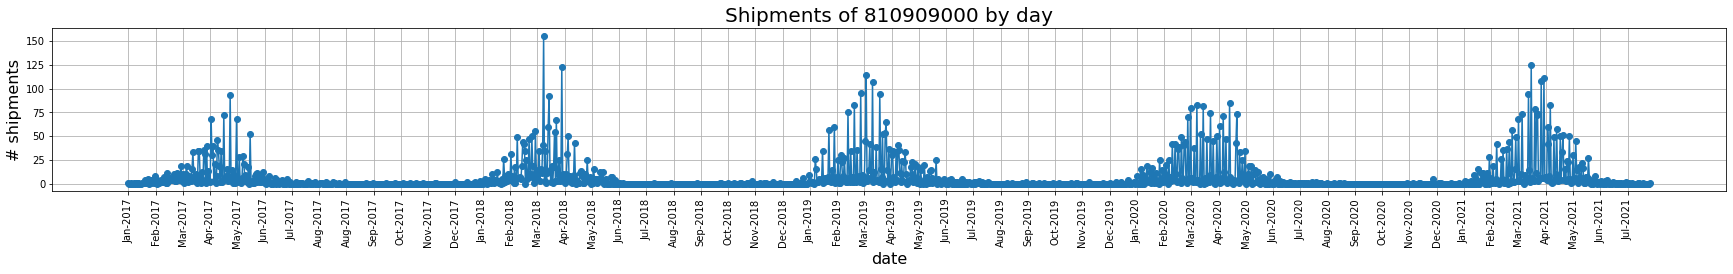

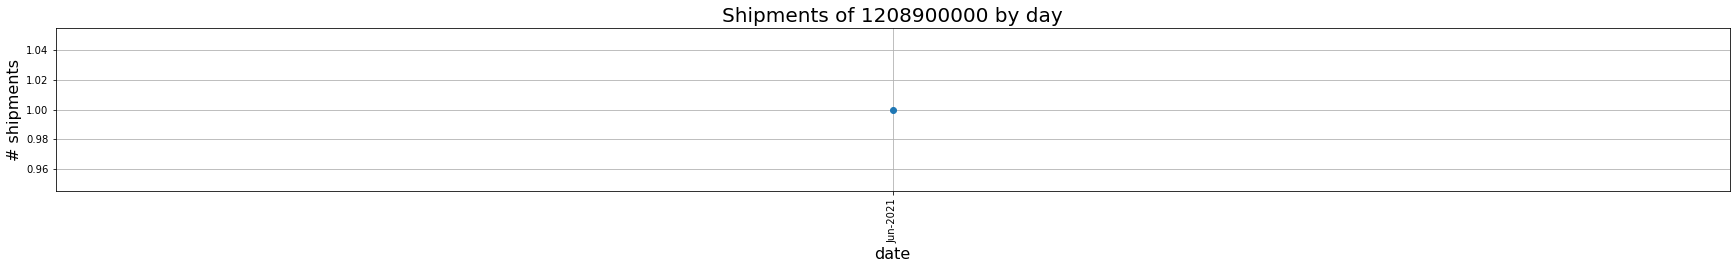

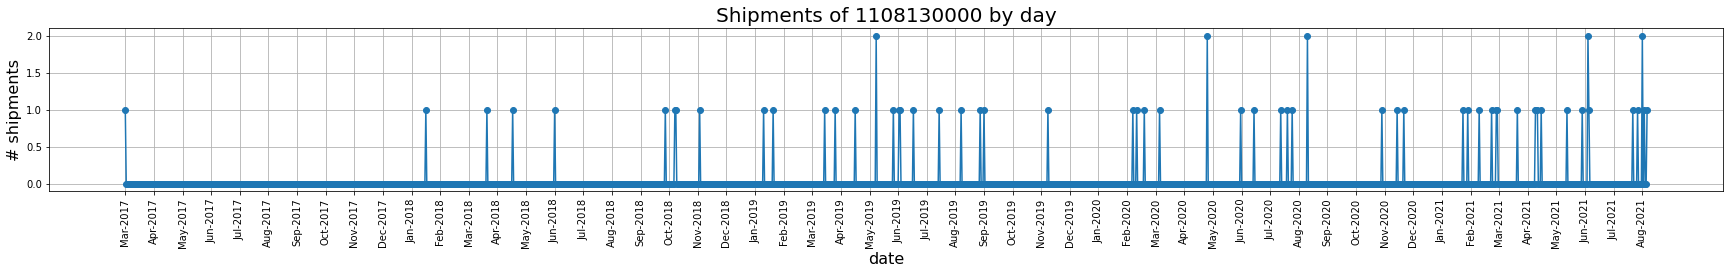

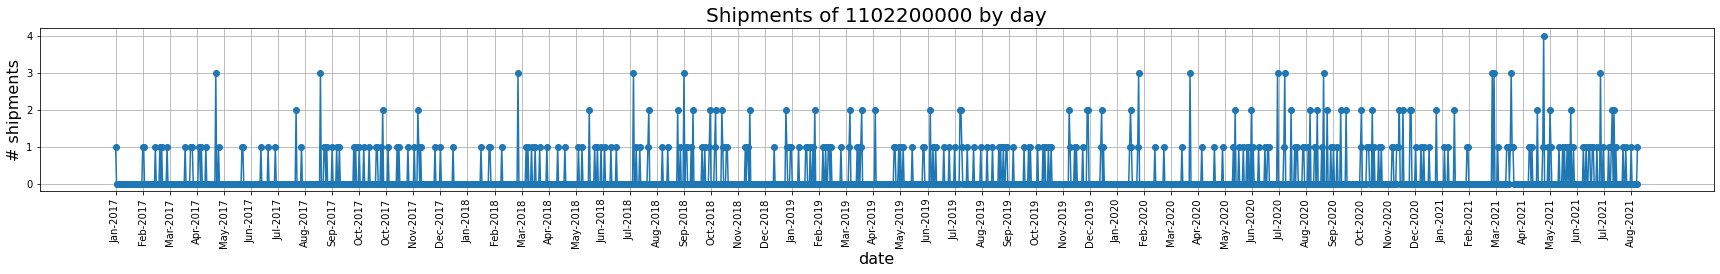

In [292]:
# Import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np


for i in range(0,len(populated_samples_dfs)-1):
    #----------------------------------------------------------------
    # GRAPH
    #----------------------------------------------------------------

    # size:
    plt.figure(figsize=(30,3))

    # title:
    plt.title('Shipments of '+ str(samples[i])+' by day', fontsize=20)

    # x axis:
    # x values
    x = range(0,len(populated_samples_dfs[i].index.date.tolist()))
    # x ticks
    my_xticks = populated_samples_dfs[i].index.date.tolist()
    for c in range(0, len(my_xticks)):
        my_xticks[c] = my_xticks[c].strftime('%h-%Y')
    plt.xticks(x[::30], my_xticks[::30], rotation='vertical')
    # # x label
    plt.xlabel("date", fontsize=16)

    # y axis:
    # y values
    y = populated_samples_dfs[i]["Count of exports"].tolist()
    # y ticks
    #plt.yticks(np.arange(populated_samples_dfs[i]["Count of exports"].min(), populated_samples_dfs[i]["Count of exports"].max()+1, 1))

    # y label
    plt.ylabel("# shipments", fontsize=16)

    # create plot
    plt.plot(x, y, marker='o')

    plt.grid()

    # show plot
    plt.show()

    #----------------------------------------------------------------

As we can see, some products (represented by its *Partida Aduanera* number) present a seasonal pattern (as expected) but others not.

#### **Remark 6**

The custom agents in Peru fill the columns of *Importador Extranjero*. Thus, we presume that there may be inconsistencies in the naming of the same company in different rows. Let's check this

We take as an example the *Importador Extranjero* value of "Comercial Agricola Montoliva Ltda.". Let's check the rows have a similar name (more than 90% similarity using Levenshtein Algorithm)

In [293]:
# Import Levenshtein
import Levenshtein

# Get the colum *Importador Extranjero*
df=pd.DataFrame(train, columns=['Importador Extranjero'])
# Add a column with the similarity magnitude according to Levenshtein Algorithm
df["Similarity"]=df.apply(lambda x: Levenshtein.ratio(x['Importador Extranjero'],  "Comercial Agricola Montoliva Ltda."), axis=1)
# Filter rows with more than 90% similarity
df.iloc[(df["Similarity"]>=0.90).values]


,Importador Extranjero,Similarity
4,Comercial Agricola Montoliva Ltda.,1.000000
157,Comercial Agricola Montoliva Ltda.,1.000000
162,Comercial Agricola Montoliva Ltda,0.985075
158,Comercial Agricola Montoliva Ltda.,1.000000


As seen, rows refering to the same company in the *Importador Extranjero* column, have slightly different values. This must be cleaned in the next section.

Let's check now for *Exportador en Peru*. We will use a random company as an example

In [294]:
# Get the colum *Importador Extranjero*
df=pd.DataFrame(train, columns=['Exportador en Perú'])
# Random company
company = df.sample()['Exportador en Perú'].values[0]
print("The company to be analyzed is: "+company)
# Add a column with the similarity magnitude according to Levenshtein Algorithm
df["Similarity"]=df.apply(lambda x: Levenshtein.ratio(x['Exportador en Perú'],  company), axis=1)
# Filter rows with more than 90% similarity
df.iloc[(df["Similarity"]>=0.9).values]

The company to be analyzed is: Agricola Cerro Prieto S.A.C.


,Exportador en Perú,Similarity
224880,Agricola Cerro Prieto S.A.C.,1.0
386158,Agricola Cerro Prieto S.A.C.,1.0
236629,Agricola Cerro Prieto S.A.C.,1.0
359103,Agricola Cerro Prieto S.A.C.,1.0
356479,Agricola Cerro Prieto S.A.C.,1.0
...,...,...
418542,Agricola Cerro Prieto S.A.C.,1.0
221756,Agricola Cerro Prieto S.A.C.,1.0
145050,Agricola Cerro Prieto S.A.C.,1.0
174596,Agricola Cerro Prieto S.A.C.,1.0


Check how many unique values are in each column:

In [295]:
df.iloc[(df["Similarity"]>=0.8).values].nunique()

Exportador en Perú    1
Similarity            1
dtype: int64

We know from Aurum that the column *Exportador en Perú* is filled from a dropdown menu. So, since it's not "typed" there are no inconsistencies. This is alligned with the results we are getting above regarding this column. As such, there is no need to clean this column.

#### **Remark 7:**

The column *Descripcion de la Partida Aduanera* gives general information about the asociated product code of *Partida aduanera*, while the column "Descripcion Comercial" contains more detailed information. Let's study this colums

In [296]:
# Select the three columns of interest
df = train[["Partida Aduanera", "Descripcion de la Partida Aduanera", "Descripcion Comercial"]]
# Get the cardinality of *Partida aduanera*
print("There are "+ str(len(df['Partida Aduanera'].unique()))+ " different codes of Partida Aduanera in total")
# Get the cardinality of *Descripcion de la Partida Aduanera*
print("There are "+ str(len(df['Descripcion de la Partida Aduanera'].unique()))+ " different values of Descripcion de la Partida Aduanera in total")
# Get the cardinality of *Partida aduanera*
print("There are "+ str(len(df['Descripcion Comercial'].unique()))+ " different values of Descripcion Comercial in total")


There are 209 different codes of Partida Aduanera in total
There are 191 different values of Descripcion de la Partida Aduanera in total
There are 84171 different values of Descripcion Comercial in total


## **4. Data cleaning**

In this stage we will clean the data and specifically the columns that we will use in the model(s) in the next section. Of course, we don´t need to clean all the columns, since many of them are not relevant for labeling the rows. So, let's first determine the columns to be used and justify why

| COLUMN | USEFUL | JUSTIFICATION |
| --- | --- | --- |
| Partida Aduanera | NO | For each customs code there is one description in *Descripcion de la Partida Aduanera*. This last carries more information about the product. So, we won´t take this attribute and consider the next one. |
| Descripcion de la Partida Aduanera | **YES** | This is a general description about the product, so this carries valuable information for the labeling |
| Aduana | NO | The port from which the product is beeing shipped. For now, we won´t consider it for our models |
| DUA | NO | This is a random generated code associated with the shipping, it does not carry information that can be captured |
| Fecha | **YES** | Associating the date of shipping to a category is insightfull. As we saw, some products are exported in specific seasons of the year |
| Año | NO | Already included in the previous attribute |
| Cod. Tributario | NO| There is one tax code for each company. A company can be associated to specific groups of products, however the amount of different companies can be huge.  |
| Exportador en Perú | NO | Same idea as previous row |
| Importador Extranjero | NO | The amount of different importers abroad may be huge and new data my carry new names not learned by the model |
| Kg Bruto | NO | See next attribute |
| Kg Neto | **YES** | The weight of the shipments is insightfull, but is highly variable among same products, so initially we won´t use this feature. However we will use it to calculate the price by kg, which is actually insightfull |
| Toneladas Netas | NO  | See previous attribute |
| Qty 1 | NO | Same as before |
| Und 1 | NO | Same as before |
| Qty 2 | NO | Same as before |
| Und 2 | NO | Same as before |
| U$ FOB Tot | **YES** | The cost of the shipment will be use to calulate the cost by kg of the product |
| Miles de USD Fob TOTAL | NO | It is just a repetition of the previous attribute |
| U$ FOB Und 1 | NO | |
| U$ FOB Und 2 | NO  |  |
| Pais de Destino | **YES** | The country were this products are beeing imported can be related to groups of products |
| Puerto de destino | NO | The previous attribute indirectly captures this information already |
| Último Puerto Embarque | NO | |
| Via | NO |  |
| Agente Portuario | NO |  |
| Agente de Aduana | NO  |  |
| Descripcion Comercial | **YES** | The comercial description also carries valuable information for the labeling |
| Descripcion1 | NO | Alredy captured in *Descripcion Comercial* |
| Descripcion2 | NO | Alredy captured in *Descripcion Comercial* |
| Descripcion3 | NO | Alredy captured in *Descripcion Comercial* |
| Descripcion4 | NO | Alredy captured in *Descripcion Comercial* |
| Descripcion5 | NO | Alredy captured in *Descripcion Comercial* |
| Naviera | NO |  |
| Agente Carga(Origen) | NO |  |
| Agente Carga(Destino) | NO |  |
| Canal | NO |  |
| Concatenar | NO |  |
| Categoría macro Aurum | NO | While we also need this category, it can be inferred given a prediction of the subcategory |
| Subcategoría inicial | **YES** | **LABEL** |
| Subcategoría Consolidada Aurum | NO |  |
| Categoría Consolidada Aurum | NO |  |

In [459]:
train_data = train[["Descripcion de la Partida Aduanera", "Fecha", "Kg Neto", "U$ FOB Tot", "Pais de Destino", "Descripcion Comercial", "Categoría macro Aurum" ]].copy()
train_data.head()

,Descripcion de la Partida Aduanera,Fecha,Kg Neto,U$ FOB Tot,Pais de Destino,Descripcion Comercial,Categoría macro Aurum
541490,UVAS FRESCAS,1/24/2021,492,1200,Estados Unidos,UVAS FRESCAS EN CAJAS VARIEDAD: IFG ELEVEN COL...,Uva
102488,"CEBOLLAS Y CHALOTES, FRESCOS O REFRIGERADOS",10/19/2020,30038,4506,Colombia,CEBOLLAS FRESCASEN SACOS DE 46 KGPARA SU COMER...,Cebolla
201853,"ESPARRAGOS, FRESCOS O REFRIGERADOS",1/29/2019,"919,6",3924,Estados Unidos,ESPARRAGOS FRESCOS CODIGO Nº13 RESTITUCION...,Espárrago
215653,"ESPARRAGOS, FRESCOS O REFRIGERADOS",12/14/2020,1925,2098,Estados Unidos,ESPARRAGOS FRESCOS EN CAJAS DRAWBACK ESPARRA...,Espárrago
312016,LAS DEMÁS CLEMENTINAS,8/5/2019,880,1346,Estados Unidos,MANDARINAS FRESCAS TANGO COLD TREATMENT EXPOR...,Mandarina


From now on we will focus on each of the selected columns

#### **Descripcion de la Partida Aduanera (description of the customs code)**

In [460]:
train_data[["Descripcion de la Partida Aduanera"]]

,Descripcion de la Partida Aduanera
541490,UVAS FRESCAS
102488,"CEBOLLAS Y CHALOTES, FRESCOS O REFRIGERADOS"
201853,"ESPARRAGOS, FRESCOS O REFRIGERADOS"
215653,"ESPARRAGOS, FRESCOS O REFRIGERADOS"
312016,LAS DEMÁS CLEMENTINAS
...,...
558088,UVAS FRESCAS
124605,"CEBOLLAS Y CHALOTES, FRESCOS O REFRIGERADOS"
544751,UVAS FRESCAS
18638,ARANDANOS O MURTONES Y DEMAS FRUTOS DEL GENERO...


Since in this column we are dealing with textual descriptions of the product, we will use Natural Language Processing techniques. A first important step that we will perform is to remove the so called *stop words* from each cell, so that we get rid of the low-level information. For example, we see that the second row in the above table has the word 'Y' (and) or 'O' (or). This words should not be considered in our future model.

To do this we will use the Natural Language Toolkit (NLTK).

In [461]:
# Import the library
import nltk
# Download the stopwords feature
nltk.download('stopwords')
# Import the stopwords
from nltk.corpus import stopwords

# Get the stopword in Spanish
sw_nltk = stopwords.words('spanish')
print("The words considered stopwords in spanish are: ")
print(sw_nltk)

The words considered stopwords in spanish are: 
['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\spost\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Now let's remove the stopwords, punctuations, accents and let's set the strings to lowercase

In [462]:
import unidecode

# Create an array with the column values
old_descriptions = train_data["Descripcion de la Partida Aduanera"].tolist()

# Array to store cleaned values
new_descriptions = []

# Remove the stopwords from each old cell and populate the new array
for sentence in old_descriptions:
    # Remove stopwords
    words = [word for word in sentence.split() if word.lower() not in sw_nltk ]
    new_text = " ".join(words)
    # Additionally remove punctuations
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    words = tokenizer.tokenize(new_text)
    new_text = " ".join(words)
    # Set to lowercase
    new_text = new_text.lower()
    # Remove accents
    new_text = unidecode.unidecode(new_text)
    # Append to the array
    new_descriptions.append(new_text)
new_descriptions

# Add the cleaned data to the training dataframe
train_data["Descripcion de la Partida Aduanera"] = new_descriptions
train_data[["Descripcion de la Partida Aduanera"]]

,Descripcion de la Partida Aduanera
541490,uvas frescas
102488,cebollas chalotes frescos refrigerados
201853,esparragos frescos refrigerados
215653,esparragos frescos refrigerados
312016,demas clementinas
...,...
558088,uvas frescas
124605,cebollas chalotes frescos refrigerados
544751,uvas frescas
18638,arandanos murtones demas frutos genero vaccini...


#### **Fecha (date)**

For this column we will map the month of shipment

In [463]:
import datetime as dt

date = train_data['Fecha'].tolist()
date = pd.to_datetime(date, infer_datetime_format=True).month
train_data['Fecha'] = date

#### **Kg Neto (net weight in of good KG) and U$ FOB Tot (total price of good)**

As we said before, here we will get the price by kg of the good. To do this we will use both columns and transform them into one.

In [464]:
# First, drop rows were weight is 0
print("From "+ str(len(train_data)) + " rows there are "+str(len(train_data[train_data['Kg Neto']==0]))+" with weight = 0")
train_data.drop(train_data[train_data["Kg Neto"] == 0].index, inplace=True)

# Then divide the price over weight
weight = train_data['Kg Neto'].str.replace(',','.').astype(float).values
price = train_data['U$ FOB Tot'].str.replace(',','.').astype(float).values
price_by_kg = np.divide(price, weight)

# Drop the used columns
train_data.drop(columns=["Kg Neto", "U$ FOB Tot"], inplace=True)

# Add the new column and name it usd_kg
train_data["usd_kg"]=price_by_kg

# Replace NaN values by 0 if any
train_data['usd_kg'] = train_data['usd_kg'].fillna(0)

# Replace inf values by 0 if any
train_data['usd_kg']= train_data['usd_kg'].replace([[np.inf, -np.inf]],0)

From 505115 rows there are 0 with weight = 0


C:\Users\spost\AppData\Local\Temp\ipykernel_19048\2764392876.py:8: RuntimeWarning: divide by zero encountered in true_divide
  price_by_kg = np.divide(price, weight)
C:\Users\spost\AppData\Local\Temp\ipykernel_19048\2764392876.py:8: RuntimeWarning: invalid value encountered in true_divide
  price_by_kg = np.divide(price, weight)


In [465]:
# Get count of NaN (should be 0)
train_data["usd_kg"].isna().sum()

0

#### **País de destino (country of destiny)**

In [466]:
countries = train_data["Pais de Destino"].unique()
countries.sort()
countries

array(['Aguas Internacionales', 'Albania', 'Alemania', 'Arabia Saudita',
       'Argelia', 'Argentina', 'Aruba', 'Australia', 'Austria', 'Bahamas',
       'Bahréin', 'Barbados', 'Bielorrusia', 'Bolivia',
       'Bosnia Y Herzegovina', 'Brasil', 'Bulgaria', 'Bélgica',
       'Cabo Verde', 'Camboya', 'Camerún', 'Canadá', 'Chile', 'China',
       'Chipre', 'Colombia', 'Corea Del Norte', 'Corea Del Sur',
       'Costa De Marfil', 'Costa Rica', 'Croacia', 'Cuba', 'Curazao',
       'Dinamarca', 'Ecuador', 'Egipto', 'El Salvador',
       'Emiratos Árabes Unidos', 'Eslovenia', 'España', 'Estados Unidos',
       'Estonia', 'Federación Rusa', 'Filipinas', 'Finlandia', 'Francia',
       'Gabón', 'Georgia', 'Ghana', 'Grecia', 'Groenlandia', 'Guadalupe',
       'Guatemala', 'Guayana Francesa', 'Haití', 'Honduras', 'Hong Kong',
       'Hungría', 'India', 'Indonesia', 'Irak', 'Irlanda',
       'Irán (República Islámica De)',
       'Islas Ultramarinas Menores De Estados Unidos', 'Israel', 'Italia',
 

The column is correct and shows not corrupted data. We will only set the values to lowercase and remove accents.

In [467]:
import unidecode

# Create an array with the column values
old_countries = train_data["Pais de Destino"].tolist()

# Array to store cleaned values
new_countries = []

# Remove the stopwords from each old cell and populate the new array
for country in old_countries:
    # Set to lowercase
    new_text = country.lower()
    # Remove accents
    new_text = unidecode.unidecode(new_text)
    # Append to the array
    new_countries.append(new_text)

# Add the cleaned data to the training dataframe
train_data["Pais de Destino"] = new_countries
train_data[["Pais de Destino"]]

,Pais de Destino
541490,estados unidos
102488,colombia
201853,estados unidos
215653,estados unidos
312016,estados unidos
...,...
558088,estados unidos
124605,colombia
544751,portugal
18638,paises bajos


#### **Descripcion Comercial (comercial description)**

As it will be shown below, there are values in this columns with repeated sentences inside

In [468]:
comercial_description = train_data["Descripcion Comercial"].tolist()
comercial_description[0]

'UVAS FRESCAS EN CAJAS VARIEDAD: IFG ELEVEN COLD TREATMEN UVAS FRESCAS EN CAJAS VARIEDAD: IFG ELEVEN COLD TREATMEN UVAS FRESCAS EN CAJAS VARIEDAD: IFG ELEVEN COLD TREATMEN UVAS FRESCAS EN CAJAS VARIEDAD: IFG ELEVEN COLD TREATMEN UVAS FRESCAS EN CAJAS VARIEDAD: IFG ELEVEN COLD TREATMEN'

Let's clean this and also remove accents, double or more white spaces, stopwords, punctuations and set to lowercase

In [469]:
import re
import unidecode
from tqdm import tqdm

# Function to remove repeated sentences inside a same string
def get_unrepeated_string(source: str) -> str:
    return re.match(r'^\s*([\w\s!"#$%&\'()*+,-./:;<=>?@{|}~º°«»\[\]§y¨`¦´¤¿]+?)(?:\s*\1)*\s*$', source)[1]

new_comercial_description = []

for description in tqdm(comercial_description):
    # First remove all accents
    new_description = unidecode.unidecode(description)
    # Remove two or more consecutive spaces and set one
    new_description= ' '.join(new_description.split())
    # Remove stopwords
    words = [word for word in new_description.split() if word.lower() not in sw_nltk ]
    new_description = " ".join(words)
    # Additionally remove punctuations
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    words = tokenizer.tokenize(new_description)
    new_description = " ".join(words)
    # Set to lowercase
    new_description = new_description.lower()
    # Then remove the duplicated sentences
    try:
        new_comercial_description.append(get_unrepeated_string(new_description))
    except:
        print(new_description)

train_data["Descripcion Comercial"] = new_comercial_description
new_comercial_description[0]

100%|██████████| 505115/505115 [00:55<00:00, 9087.15it/s]


'uvas frescas cajas variedad ifg eleven cold treatmen'

#### **Subcategoría inicial (subcategories)**

This is the column to predict

Finally, our data is clean and ready to be preprocessed. As a las step, we will reset the indexes.

In [470]:
train_data.reset_index(drop=True, inplace=True)
train_data.to_csv('../data/cleaned_data/cleaned_train_data.csv', index=False)
train_data

,Descripcion de la Partida Aduanera,Fecha,Pais de Destino,Descripcion Comercial,Categoría macro Aurum,usd_kg
0,uvas frescas,1,estados unidos,uvas frescas cajas variedad ifg eleven cold tr...,Uva,2.439024
1,cebollas chalotes frescos refrigerados,10,colombia,cebollas frescasen sacos 46 kgpara comercializ...,Cebolla,0.150010
2,esparragos frescos refrigerados,1,estados unidos,esparragos frescos codigo no13 restitucion der...,Espárrago,4.267073
3,esparragos frescos refrigerados,12,estados unidos,esparragos frescos cajas drawback,Espárrago,1.089870
4,demas clementinas,8,estados unidos,mandarinas frescas tango cold treatment export...,Mandarina,1.529545
...,...,...,...,...,...,...
505110,uvas frescas,12,estados unidos,uvas frescas variedad sweet globe condicion co...,Uva,0.085366
505111,cebollas chalotes frescos refrigerados,4,colombia,cebolla fresca rojaembalada sacos 653 sacos 46...,Cebolla,0.283308
505112,uvas frescas,1,portugal,uvas frescas cajas variedad sugraone cold trea...,Uva,0.975610
505113,arandanos murtones demas frutos genero vaccini...,10,paises bajos,arandano fresco cajas acoge drawback,Arándano,4.793833


#### **Testing data cleaning**

Following the above approaches, we clean the testing data

In [471]:
# Get the data
test_data = test[["Descripcion de la Partida Aduanera", "Fecha", "Kg Neto", "U$ FOB Tot", "Pais de Destino", "Descripcion Comercial", "Categoría macro Aurum" ]].copy()

# ---Clean *Descripcion de la Partida Aduanera*---
# Import the libraries
import nltk
import unidecode
# Download the stopwords feature
nltk.download('stopwords')
# Import the stopwords
from nltk.corpus import stopwords
# Get the stopword in Spanish
sw_nltk = stopwords.words('spanish')
# Create an array with the column values
old_descriptions = test_data["Descripcion de la Partida Aduanera"].tolist()
# Array to store cleaned values
new_descriptions = []
# Remove the stopwords from each old cell and populate the new array
for sentence in old_descriptions:
    # Remove stopwords
    words = [word for word in sentence.split() if word.lower() not in sw_nltk ]
    new_text = " ".join(words)
    # Additionally remove punctuations
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    words = tokenizer.tokenize(new_text)
    new_text = " ".join(words)
    # Set to lowercase
    new_text = new_text.lower()
    # Remove accents
    new_text = unidecode.unidecode(new_text)
    # Append to the array
    new_descriptions.append(new_text)
new_descriptions
# Add the cleaned data to the testing dataframe
test_data["Descripcion de la Partida Aduanera"] = new_descriptions
#---

# ---Clean *Fecha*---
import datetime as dt
date = test_data['Fecha'].tolist()
date = pd.to_datetime(date, infer_datetime_format=True).month
test_data['Fecha'] = date
#---

# ---Clean *Kg Neto and U$ FOB Tot*---
# First, drop rows were weight is 0
print("From "+ str(len(test_data)) + " rows there are "+str(len(test_data[test_data['Kg Neto']==0]))+" with weight = 0")
test_data.drop(test_data[test_data["Kg Neto"] == 0].index, inplace=True)
# Then divide the price over weight
weight = test_data['Kg Neto'].str.replace(',','.').astype(float).values
price = test_data['U$ FOB Tot'].str.replace(',','.').astype(float).values
price_by_kg = np.divide(price, weight)
# Drop the used columns
test_data.drop(columns=["Kg Neto", "U$ FOB Tot"], inplace=True)
# Add the new column and name it usd_kg
test_data["usd_kg"]=price_by_kg
# Replace NaN values by 0 if any
test_data['usd_kg'] = test_data['usd_kg'].fillna(0)
# Replace inf values by 0 if any
test_data['usd_kg'] = test_data['usd_kg'].replace([[np.inf, -np.inf]],0)
#---

# ---Clean *Pais de destino*---
# Create an array with the column values
old_countries = test_data["Pais de Destino"].tolist()
# Array to store cleaned values
new_countries = []
# Remove the stopwords from each old cell and populate the new array
for country in old_countries:
    # Set to lowercase
    new_text = country.lower()
    # Remove accents
    new_text = unidecode.unidecode(new_text)
    # Append to the array
    new_countries.append(new_text)
# Add the cleaned data to the training dataframe
test_data["Pais de Destino"] = new_countries
#---

# ---Clean *Descripcion Comercial (comercial description)*---
comercial_description = test_data["Descripcion Comercial"].tolist()
from tqdm import tqdm
# Function to remove repeated sentences inside a same string
def get_unrepeated_string(source: str) -> str:
    return re.match(r'^\s*([\w\s!"#$%&\'()*+,-./:;<=>?@{|}~º°«»\[\]§y¨`¦´¤¿]+?)(?:\s*\1)*\s*$', source)[1]
new_comercial_description = []
for description in tqdm(comercial_description):
    # First remove all accents
    new_description = unidecode.unidecode(description)
    # Remove two or more consecutive spaces and set one
    new_description= ' '.join(new_description.split())
    # Remove stopwords
    words = [word for word in new_description.split() if word.lower() not in sw_nltk ]
    new_description = " ".join(words)
    # Additionally remove punctuations
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    words = tokenizer.tokenize(new_description)
    new_description = " ".join(words)
    # Set to lowercase
    new_description = new_description.lower()
    # Then remove the duplicated sentences
    try:
        new_comercial_description.append(get_unrepeated_string(new_description))
    except:
        print(new_description)
test_data["Descripcion Comercial"] = new_comercial_description
#---

# Save the data
test_data.reset_index(drop=True, inplace=True)
test_data.to_csv('../data/cleaned_data/cleaned_test_data.csv', index=False)
test_data

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\spost\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


From 126279 rows there are 0 with weight = 0


C:\Users\spost\AppData\Local\Temp\ipykernel_19048\2146720029.py:52: RuntimeWarning: divide by zero encountered in true_divide
  price_by_kg = np.divide(price, weight)
C:\Users\spost\AppData\Local\Temp\ipykernel_19048\2146720029.py:52: RuntimeWarning: invalid value encountered in true_divide
  price_by_kg = np.divide(price, weight)
100%|██████████| 126279/126279 [00:13<00:00, 9240.08it/s]


,Descripcion de la Partida Aduanera,Fecha,Pais de Destino,Descripcion Comercial,Categoría macro Aurum,usd_kg
0,uvas frescas,12,estados unidos,uvas frescas cajas consumo humano cold treatme...,Uva,0.000000
1,uvas frescas,1,hong kong,uvas frescas cajas acoge drawback,Uva,1.707317
2,cebollas chalotes frescos refrigerados,9,estados unidos,cebolla amarilla dulce fresca sacos acoge draw...,Cebolla,0.420000
3,demas cafe incluso tostado descafeinado cascar...,11,reino unido,cafe verde grano sacos consumo humano,Café,0.000000
4,uvas frescas,12,estados unidos,uvas frescas cajas acoge drawback,Uva,0.000000
...,...,...,...,...,...,...
126274,demas flores capullos cortados ramos adornos f...,2,estados unidos,flores frescas delphinium liatris sunflower ca...,Flores,6.000000
126275,uvas frescas,12,paises bajos,uvas frescas cajas acoge drawback,Uva,0.000000
126276,aguacates paltas frescas secas,6,estados unidos,palta fresca variedad hass uso consumo humano ...,Palta,2.321429
126277,aguacates paltas frescas secas,6,espana,paltas frescas variedad hass cajas consumo humano,Palta,2.353653


## **5. Data Preprocessing**

In this stage we will preprocess the data to be used in a classification model. As seen in the Data Exploration section, there is a big class inbalance. We will adress this issue as first step.



In [480]:
# Import the cleaned data
train_data = pd.read_csv('../data/cleaned_data/cleaned_train_data.csv')
# Select the target variable and the explanatory variables
y = train_data[['Categoría macro Aurum']].values
X = train_data.drop(['Categoría macro Aurum'], axis=1).values

We will use a method called Oversampling, in which we will increase the low counts' classes by duplicating their rows as many times as needed

In [481]:
# Import the library for Oversampling
from imblearn.over_sampling import RandomOverSampler
# Create the oversampling model
ros = RandomOverSampler(random_state=0)
# Get the oversampled dataset
X_resampled, y_resampled = ros.fit_resample(X, y)

In [482]:
# Get the count of rows after oversampling
len(X_resampled)

3799126

Since there was a big umbalance, the oversample generates too many extra rows. We will sample this new resampled dataset.

In [483]:
import numpy as np
# We sample 100,000 rows from the new oversampled dataset
idx = np.random.choice(np.arange(len(X_resampled)), 100000, replace=False)
y_sample = y_resampled[idx]
x_sample = X_resampled[idx]

Convert the resample dataset into a dataframe and persist locally it for easy future use

In [484]:
import numpy as np
resampled_train = np.column_stack((x_sample, y_sample))
resampled_train = pd.DataFrame(resampled_train, columns=['Descripcion de la Partida Aduanera', 'Fecha', 'Pais de Destino', 'Descripcion Comercial', 'usd_kg', 'Categoría macro Aurum'])
resampled_train.to_csv("../data/preprocessed_data/resampled_data.csv",  index=False)

Now recheck the class balance

In [485]:
resampled_train["Categoría macro Aurum"].value_counts()

Zapallo      3060
Vid          3021
Tuna         3018
Avena        3004
Espárrago    2997
Palta        2989
Frambuesa    2980
Orégano      2972
Brócoli      2963
Haba         2962
Alcachofa    2961
Arveja       2960
Aceituna     2960
Quinua       2959
Maíz         2951
Uva          2949
Trigo        2945
Granada      2942
Ají          2940
Alfalfa      2937
Arándano     2934
Flores       2918
Café         2918
Paprika      2918
Frejol       2911
Papa         2911
Zanahoria    2904
Cebolla      2900
Arroz        2894
Fresa        2888
Tomate       2881
Ajo          2878
Mandarina    2857
Azúcar       2818
Name: Categoría macro Aurum, dtype: int64

As shown above, now the classes are balanced

We are dealing with text, categorical and numerical data in this dataset. The next step will be then to represent the text columns as numbers, which is known as *sentence embedding*. This will be done in the columns *Descripcion de la Partida Aduanera* and *Descripcion Comercial*. Let's create a function to convert the text columns into vectors.

In [486]:
# Function to convert a column with strings into vectors (the input is a list with the strings of the column)

def col2vectors(rows):
    # Import libraries for sentence embedding
    from gensim.models.doc2vec import Doc2Vec, TaggedDocument
    import gensim
    import gensim.downloader as api

    # Get arrays of words for each row
    data = [row.split() for row in rows]

    # Create a TaggedDocument for each array (this is the input format for Doc2Vec)
    def tagged_document(list_of_list_of_words):
        for i, list_of_words in enumerate(list_of_list_of_words):
            yield gensim.models.doc2vec.TaggedDocument(list_of_words, [i])

    # Get the data for training by converting the arrays to TaggedDocuments
    data_for_training = list(tagged_document(data))

    # Create the model
    model = gensim.models.doc2vec.Doc2Vec(vector_size=10, min_count=2, epochs=10)
    model.build_vocab(data_for_training)

    # Train the model
    model.train(data_for_training, total_examples=model.corpus_count, epochs=model.epochs)

    return model

Convert *Descripcion de la Partida Aduanera (description of the customs code)*

In [487]:
# Get the column
descriptions = resampled_train["Descripcion de la Partida Aduanera"].values
model = col2vectors(descriptions)

Save the model locally for future use

In [488]:
# Save model
model.save("../models/custom_descriptions_doc2vec_model")

Convert *Descripcion Comercial (comercial description)*

Let's do the same for this column

In [489]:
# Get the column
descriptions = resampled_train["Descripcion Comercial"].values
model = col2vectors(descriptions)

Save the model locally for future use

In [490]:
# Save model
model.save("../models/comercial_descriptions_doc2vec_model")

## **6. Model Building**

In this section we will create predictive models using different approaches

### **6.1. Multi-Layer Perceptron**

#### **6.1.1. Using only text colums**

##### **6.1.1.1 Using *Descripcion Comercial* (comercial description)**

In [491]:
import pandas as pd
from gensim.models.doc2vec import Doc2Vec
from tqdm import tqdm

# Import the training data
training_data = pd.read_csv('../data/preprocessed_data/resampled_data.csv')

# Get the column and convert to vector using the doc2vec model trained before
model = Doc2Vec.load('../models/comercial_descriptions_doc2vec_model')
X = []
for row in tqdm(training_data['Descripcion Comercial'].tolist()):
    X.append(model.infer_vector(row.split(), epochs=10))

# for i in tqdm(range(0,len(model.dv))):
#     X.append(model.dv[i])

# Get the target variable column
y = training_data['Categoría macro Aurum'].tolist()

 21%|██        | 20748/100000 [00:10<00:38, 2074.10it/s]


KeyboardInterrupt: 

In [ ]:
# Build the model
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-3, hidden_layer_sizes=(16, 8, 8), random_state=1, max_iter=1000, early_stopping=True, verbose=True)

In [ ]:
# Fit the model
clf.fit(X[:], y[:])

Iteration 1, loss = 3.51403198
Validation score: 0.060100
Iteration 2, loss = 3.38759265
Validation score: 0.109600
Iteration 3, loss = 3.27186528
Validation score: 0.129000
Iteration 4, loss = 3.18373898
Validation score: 0.151400
Iteration 5, loss = 3.12298753
Validation score: 0.157500
Iteration 6, loss = 3.07823594
Validation score: 0.167500
Iteration 7, loss = 3.04419942
Validation score: 0.170900
Iteration 8, loss = 3.01934948
Validation score: 0.182900
Iteration 9, loss = 2.99995725
Validation score: 0.183000
Iteration 10, loss = 2.98358277
Validation score: 0.184500
Iteration 11, loss = 2.96778779
Validation score: 0.190100
Iteration 12, loss = 2.95189099
Validation score: 0.193300
Iteration 13, loss = 2.93717430
Validation score: 0.203200
Iteration 14, loss = 2.92309456
Validation score: 0.205700
Iteration 15, loss = 2.90979766
Validation score: 0.205600
Iteration 16, loss = 2.89704003
Validation score: 0.209800
Iteration 17, loss = 2.88444489
Validation score: 0.209900
Iterat

MLPClassifier(alpha=0.001, early_stopping=True, hidden_layer_sizes=(16, 8, 8),
              max_iter=1000, random_state=1, verbose=True)

Now we will test the accuracy of the model using our testing data

In [ ]:
# Get the testing data
testing_data = pd.read_csv('../data/cleaned_data/cleaned_test_data.csv')
# Get the column and convert to vector using the doc2vec model trained before
model = Doc2Vec.load('../models/comercial_descriptions_doc2vec_model')
X_test = []
for row in tqdm(testing_data['Descripcion Comercial'].tolist()):
    X_test.append(model.infer_vector(row.split(), epochs=10))
# Get the actual target variable column 
original = testing_data['Categoría macro Aurum'].tolist()
# Get the predictions
predictions = clf.predict(X_test)


100%|██████████| 126279/126279 [01:02<00:00, 2014.63it/s]


Get the % of accuracy

In [ ]:
# Get the % of accuracy
accuracy = sum(x == y for x, y in zip(original, predictions))/len(predictions)
print("The accuracy of the predictions is: "+str(round(accuracy*100,2)) +"%")

The accuracy of the predictions is: 23.7%


Create a confusion matrix

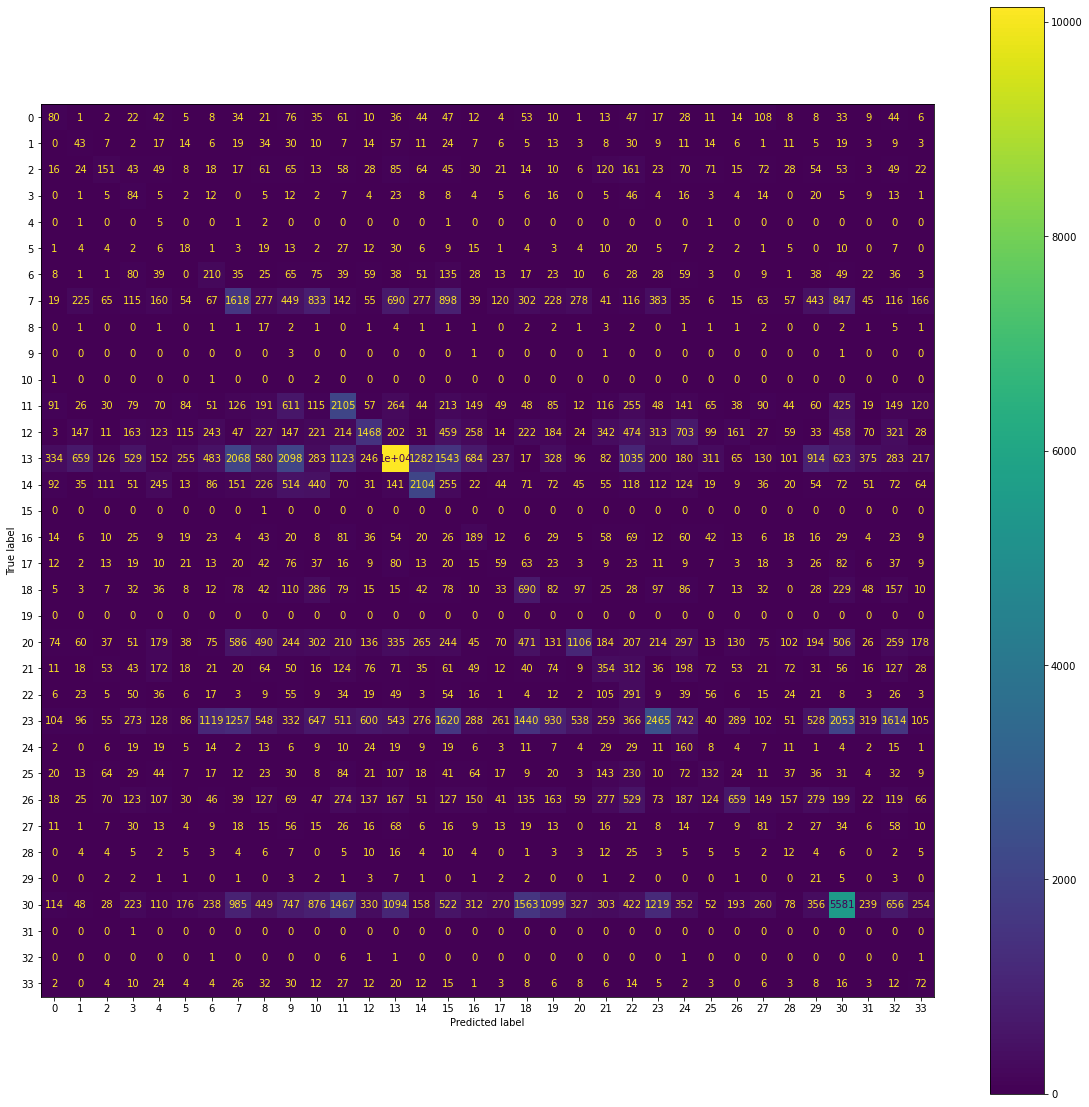

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

f,ax = plt.subplots(figsize=(20,20))
cm = confusion_matrix(original, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)

##### **6.1.1.2 Using *Descripcion de la Partida Aduanera* (customs description)**

In [ ]:
import pandas as pd
from gensim.models.doc2vec import Doc2Vec
from tqdm import tqdm

# Import the training data
training_data = pd.read_csv('../data/preprocessed_data/resampled_data.csv')

# Get the column and convert to vector using the doc2vec model trained before
model = Doc2Vec.load('../models/custom_descriptions_doc2vec_model')
X = []
for row in tqdm(training_data['Descripcion de la Partida Aduanera'].tolist()):
    X.append(model.infer_vector(row.split(), epochs=10))

# Get the target variable column
y = training_data['Categoría macro Aurum'].tolist()

100%|██████████| 100000/100000 [00:36<00:00, 2704.51it/s]


In [ ]:
# Build the model
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-3, hidden_layer_sizes=(16, 8, 8), random_state=1, max_iter=1000, early_stopping=True, verbose=True)

In [ ]:
# Fit the model
clf.fit(X[:], y[:])

Iteration 1, loss = 3.41569019
Validation score: 0.097800
Iteration 2, loss = 2.98957288
Validation score: 0.173500
Iteration 3, loss = 2.83087164
Validation score: 0.208700
Iteration 4, loss = 2.73736180
Validation score: 0.246400
Iteration 5, loss = 2.65317846
Validation score: 0.279700
Iteration 6, loss = 2.56975701
Validation score: 0.294200
Iteration 7, loss = 2.50765027
Validation score: 0.315700
Iteration 8, loss = 2.46382651
Validation score: 0.328500
Iteration 9, loss = 2.41818182
Validation score: 0.333900
Iteration 10, loss = 2.38444738
Validation score: 0.344500
Iteration 11, loss = 2.35456849
Validation score: 0.353300
Iteration 12, loss = 2.32309440
Validation score: 0.363800
Iteration 13, loss = 2.28652166
Validation score: 0.381500
Iteration 14, loss = 2.23956671
Validation score: 0.392500
Iteration 15, loss = 2.18464305
Validation score: 0.410200
Iteration 16, loss = 2.13349453
Validation score: 0.424200
Iteration 17, loss = 2.09322565
Validation score: 0.434800
Iterat

MLPClassifier(alpha=0.001, early_stopping=True, hidden_layer_sizes=(16, 8, 8),
              max_iter=1000, random_state=1, verbose=True)

Now we will test the accuracy of the model using our testing data

In [ ]:
# Get the testing data
testing_data = pd.read_csv('../data/cleaned_data/cleaned_test_data.csv')
# Get the column and convert to vector using the doc2vec model trained before
model = Doc2Vec.load('../models/custom_descriptions_doc2vec_model')
X_test = []
for row in tqdm(testing_data['Descripcion de la Partida Aduanera'].tolist()):
    X_test.append(model.infer_vector(row.split(), epochs=10))
# Get the actual target variable column 
original = testing_data['Categoría macro Aurum'].tolist()
# Get the predictions
predictions = clf.predict(X_test)

100%|██████████| 126279/126279 [00:45<00:00, 2804.35it/s]


Get the % of accuracy

In [ ]:
# Get the % of accuracy
accuracy = sum(x == y for x, y in zip(original, predictions))/len(predictions)
print("The accuracy of the predictions is: "+str(round(accuracy*100,2)) +"%")

The accuracy of the predictions is: 82.32%


Create a confusion matrix


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

f,ax = plt.subplots(figsize=(20,20))
cm = confusion_matrix(original, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)

##### **6.1.1.3 Using *Descripcion Comercial* (comercial description) and *Descripcion de Partida Aduanera* (customs description)**

In [ ]:
import pandas as pd
from gensim.models.doc2vec import Doc2Vec
from tqdm import tqdm

# Import the training data
training_data = pd.read_csv('../data/preprocessed_data/resampled_data.csv')

# Get the comercial description column and convert to vector using the doc2vec model trained before
comercial_model = Doc2Vec.load('../models/comercial_descriptions_doc2vec_model')
# Get the customs description column and convert to vector using the doc2vec model trained before
customs_model = Doc2Vec.load('../models/custom_descriptions_doc2vec_model')
X = []
for i in tqdm(range(0, len(training_data))):
    # Get the vector for the comercial description
    comercial_row = comercial_model.infer_vector(training_data["Descripcion Comercial"].tolist()[i].split(), epochs=10)
    # Get the vector for the customs description
    customs_row = customs_model.infer_vector(training_data["Descripcion de la Partida Aduanera"].tolist()[i].split(), epochs=10)
    # Concatenate the two vectors
    X.append([*comercial_row, *customs_row])

# Get the target variable column
y = training_data['Categoría macro Aurum'].tolist()

100%|██████████| 100000/100000 [03:51<00:00, 432.61it/s]


In [ ]:
# Build the model
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-3, hidden_layer_sizes=(16, 8, 8), random_state=1, max_iter=1000, early_stopping=True, verbose=True)

In [ ]:
# Fit the model
clf.fit(X[:], y[:])

Iteration 1, loss = 3.42164264
Validation score: 0.124700
Iteration 2, loss = 2.91248323
Validation score: 0.219700
Iteration 3, loss = 2.71141177
Validation score: 0.259300
Iteration 4, loss = 2.58465274
Validation score: 0.298500
Iteration 5, loss = 2.48514114
Validation score: 0.318900
Iteration 6, loss = 2.41033458
Validation score: 0.342800
Iteration 7, loss = 2.34849204
Validation score: 0.365000
Iteration 8, loss = 2.26392804
Validation score: 0.396400
Iteration 9, loss = 2.16806786
Validation score: 0.422100
Iteration 10, loss = 2.09668024
Validation score: 0.437300
Iteration 11, loss = 2.04077184
Validation score: 0.447600
Iteration 12, loss = 1.99221190
Validation score: 0.468400
Iteration 13, loss = 1.95192742
Validation score: 0.484000
Iteration 14, loss = 1.91909330
Validation score: 0.488500
Iteration 15, loss = 1.89293228
Validation score: 0.491300
Iteration 16, loss = 1.86932553
Validation score: 0.493600
Iteration 17, loss = 1.84759089
Validation score: 0.501900
Iterat

MLPClassifier(alpha=0.001, early_stopping=True, hidden_layer_sizes=(16, 8, 8),
              max_iter=1000, random_state=1, verbose=True)

Now we will test the accuracy of the model using our testing data

In [ ]:
# Get the testing data
testing_data = pd.read_csv('../data/cleaned_data/cleaned_test_data.csv')
# Get the comercial description column and convert to vector using the doc2vec model trained before
comercial_model = Doc2Vec.load('../models/comercial_descriptions_doc2vec_model')
# Get the customs description column and convert to vector using the doc2vec model trained before
customs_model = Doc2Vec.load('../models/custom_descriptions_doc2vec_model')
X_test = []
for i in tqdm(range(0, len(testing_data))):
    # Get the vector for the comercial description
    comercial_row = comercial_model.infer_vector(testing_data["Descripcion Comercial"].tolist()[i].split(), epochs=10)
    # Get the vector for the customs description
    customs_row = customs_model.infer_vector(testing_data["Descripcion de la Partida Aduanera"].tolist()[i].split(), epochs=10)
    # Concatenate the two vectors
    X_test.append([*comercial_row, *customs_row])
# Get the actual target variable column 
original = testing_data['Categoría macro Aurum'].tolist()
# Get the predictions
predictions = clf.predict(X_test)

100%|██████████| 126279/126279 [05:57<00:00, 352.86it/s]


Get the % of accuracy

In [ ]:
# Get the % of accuracy
accuracy = sum(x == y for x, y in zip(original, predictions))/len(predictions)
print("The accuracy of the predictions is: "+str(round(accuracy*100,2)) +"%")

The accuracy of the predictions is: 81.34%


Create a confusion matrix

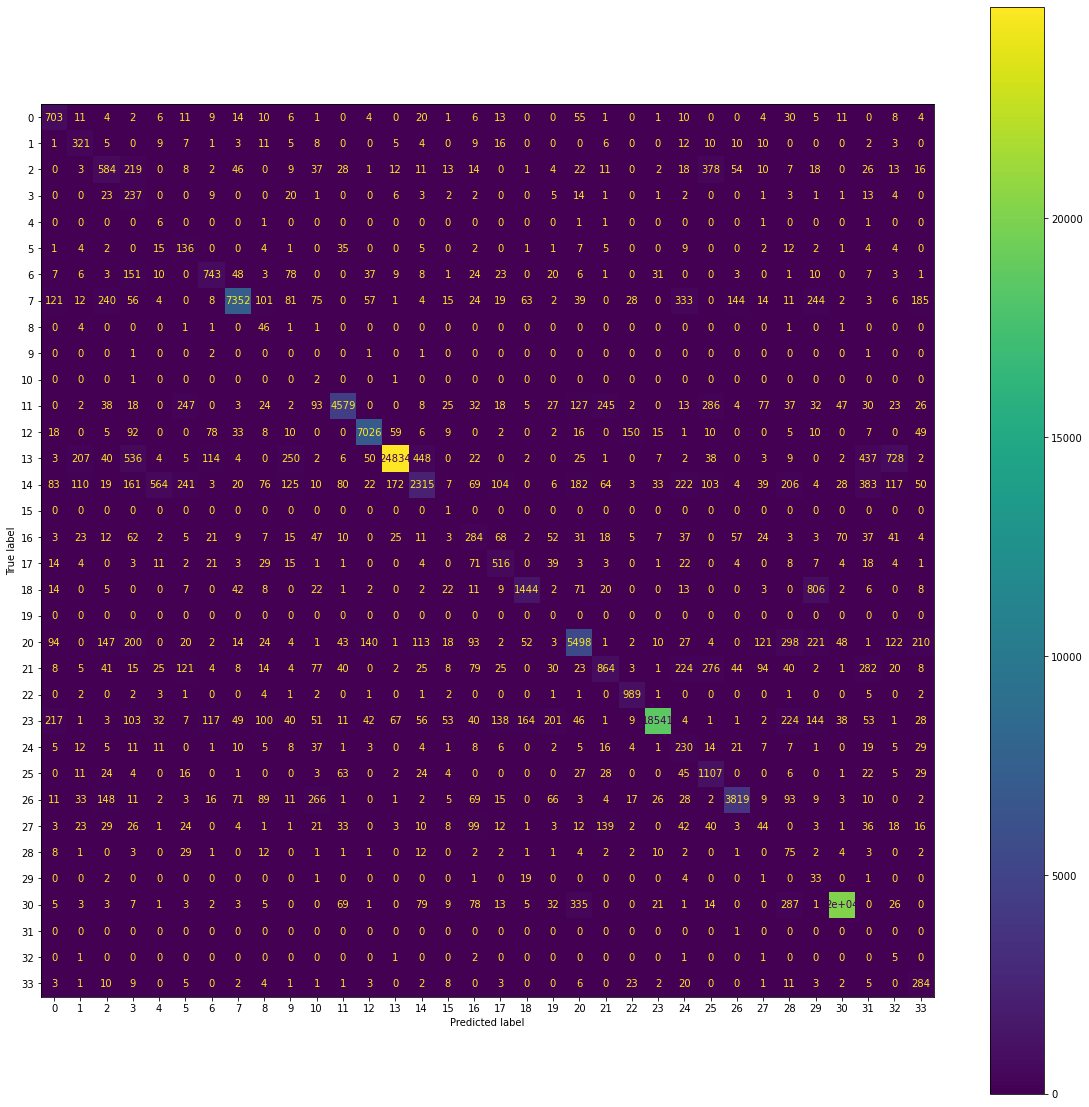

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

f,ax = plt.subplots(figsize=(20,20))
cm = confusion_matrix(original, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)

#### **6.1.2. Using text colums and categorical data**

##### **6.1.2.1 Using *Descripcion de la Partida Aduanera* (customs description) and *Pais de Destino* (country of destiny)**

First, we will convert the countries' column into a set of binary attributes (one hot encodding).

In [ ]:
# Import the training data
training_data = pd.read_csv('../data/preprocessed_data/resampled_data.csv')

# Import the one hot encoding library
from sklearn.preprocessing import OneHotEncoder

# Note: Since we will convert the countries column into multiple binary columns, we need ALL the possible countries. While splitting in training and testing data and resampling
# the testing data, we may loose countries that may come in a testing set. As such, we will get a list with all the possible countries from the raw data. Of course, it mus be cleaned.
# Get all possible countries
all_countries = pd.read_csv('../data/raw_data/data.csv', encoding='latin-1', sep=';')["Pais de Destino"].unique()
import unidecode
# Array to store cleaned values
all_cleaned_countries = []
# Remove the stopwords from each old cell and populate the new array
for country in all_countries:
    # Set to lowercase
    new_text = country.lower()
    # Remove accents
    new_text = unidecode.unidecode(new_text)
    # Append to the array
    all_cleaned_countries.append(new_text)

# Apply the encoding of the countries
countries = OneHotEncoder(categories=[all_cleaned_countries])
countries = countries.fit_transform(training_data['Pais de Destino'].values.reshape(-1,1))
countries = countries.toarray()

C:\Users\spost\AppData\Local\Temp\ipykernel_19048\3214509931.py:10: DtypeWarning: Columns (6,14,16,22,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  all_countries = pd.read_csv('../data/raw_data/data.csv', encoding='latin-1', sep=';')["Pais de Destino"].unique()


Now, create the inputs to train the model

In [ ]:
import pandas as pd
from gensim.models.doc2vec import Doc2Vec
from tqdm import tqdm

# Import the training data
training_data = pd.read_csv('../data/preprocessed_data/resampled_data.csv')

# Get the column and convert to vector using the doc2vec model trained before
model = Doc2Vec.load('../models/custom_descriptions_doc2vec_model')

# Create the inputs for the model
X = []
for i in tqdm(range(0, len(training_data))):
    X.append([*model.infer_vector(training_data["Descripcion de la Partida Aduanera"].tolist()[i].split(), epochs=10),*countries[i]])

# Get the target variable column
y = training_data['Categoría macro Aurum'].tolist()

100%|██████████| 100000/100000 [02:16<00:00, 731.85it/s]


In [ ]:
# Build the model
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-3, hidden_layer_sizes=(16, 8, 8), random_state=1, max_iter=1000, early_stopping=True, verbose=True)

In [ ]:
# Fit the model
clf.fit(X[:], y[:])

Iteration 1, loss = 3.33998800
Validation score: 0.213100
Iteration 2, loss = 2.71094032
Validation score: 0.311000
Iteration 3, loss = 2.41645889
Validation score: 0.342100
Iteration 4, loss = 2.23545102
Validation score: 0.393700
Iteration 5, loss = 2.11492791
Validation score: 0.417400
Iteration 6, loss = 2.02326193
Validation score: 0.440200
Iteration 7, loss = 1.95138956
Validation score: 0.472600
Iteration 8, loss = 1.89160677
Validation score: 0.488700
Iteration 9, loss = 1.84101548
Validation score: 0.501600
Iteration 10, loss = 1.79568068
Validation score: 0.519200
Iteration 11, loss = 1.75547702
Validation score: 0.532400
Iteration 12, loss = 1.72348598
Validation score: 0.542900
Iteration 13, loss = 1.69487634
Validation score: 0.550400
Iteration 14, loss = 1.66777853
Validation score: 0.566300
Iteration 15, loss = 1.64331359
Validation score: 0.580700
Iteration 16, loss = 1.62174050
Validation score: 0.585900
Iteration 17, loss = 1.60037720
Validation score: 0.585500
Iterat

MLPClassifier(alpha=0.001, early_stopping=True, hidden_layer_sizes=(16, 8, 8),
              max_iter=1000, random_state=1, verbose=True)

Now we will test the accuracy of the model using our testing data

In [ ]:
# Get the testing data
testing_data = pd.read_csv('../data/cleaned_data/cleaned_test_data.csv')
# Get the customs description column and convert to vector using the doc2vec model trained before
customs_model = Doc2Vec.load('../models/custom_descriptions_doc2vec_model')
# Get the one hot encoding representation of the column of countries
countries = OneHotEncoder(categories=[all_cleaned_countries]).fit_transform(testing_data['Pais de Destino'].values.reshape(-1,1))
countries = countries.toarray()
X_test = []
for i in tqdm(range(0, len(testing_data))):
    # Get the vector for the customs description
    customs_row = customs_model.infer_vector(testing_data["Descripcion de la Partida Aduanera"].tolist()[i].split(), epochs=10)
    # Concatenate the two vectors
    X_test.append([*customs_row, *countries[i]])
# Get the actual target variable column 
original = testing_data['Categoría macro Aurum'].tolist()
# Get the predictions
predictions = clf.predict(X_test)

100%|██████████| 126279/126279 [03:00<00:00, 699.02it/s]


Get the % of accuracy

In [ ]:
# Get the % of accuracy
accuracy = sum(x == y for x, y in zip(original, predictions))/len(predictions)
print("The accuracy of the predictions is: "+str(round(accuracy*100,2)) +"%")

The accuracy of the predictions is: 78.72%


##### **6.1.2.2 Using *Descripcion de la Partida Aduanera* (customs description) and *Fecha* (date)**

First, we will convert the dates' column (month) into a set of binary attributes (one hot encodding).

In [ ]:
# Import the training data
training_data = pd.read_csv('../data/preprocessed_data/resampled_data.csv')

# Import the one hot encoding library
from sklearn.preprocessing import OneHotEncoder

# Apply the encoding of the countries
dates = OneHotEncoder().fit_transform(training_data['Fecha'].values.reshape(-1,1))
dates = dates.toarray()

Now, create the inputs to train the model

In [ ]:
import pandas as pd
from gensim.models.doc2vec import Doc2Vec
from tqdm import tqdm

# Import the training data
training_data = pd.read_csv('../data/preprocessed_data/resampled_data.csv')

# Get the column and convert to vector using the doc2vec model trained before
model = Doc2Vec.load('../models/custom_descriptions_doc2vec_model')

# Create the inputs for the model
X = []
for i in tqdm(range(0, len(training_data))):
    X.append([*model.infer_vector(training_data["Descripcion de la Partida Aduanera"].tolist()[i].split(), epochs=10),*dates[i]])

# Get the target variable column
y = training_data['Categoría macro Aurum'].tolist()

100%|██████████| 100000/100000 [02:13<00:00, 750.29it/s]


In [ ]:
# Build the model
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-3, hidden_layer_sizes=(16, 8, 8), random_state=1, max_iter=1000, early_stopping=True, verbose=True)

In [ ]:
# Fit the model
clf.fit(X[:], y[:])

Iteration 1, loss = 3.41954308
Validation score: 0.134600
Iteration 2, loss = 2.95254878
Validation score: 0.222300
Iteration 3, loss = 2.61740695
Validation score: 0.267300
Iteration 4, loss = 2.47665897
Validation score: 0.303000
Iteration 5, loss = 2.37639983
Validation score: 0.345900
Iteration 6, loss = 2.28876223
Validation score: 0.373500
Iteration 7, loss = 2.20957908
Validation score: 0.399200
Iteration 8, loss = 2.13860820
Validation score: 0.409400
Iteration 9, loss = 2.08099552
Validation score: 0.424500
Iteration 10, loss = 2.03784539
Validation score: 0.440200
Iteration 11, loss = 2.00204640
Validation score: 0.447200
Iteration 12, loss = 1.96894262
Validation score: 0.461600
Iteration 13, loss = 1.94035913
Validation score: 0.467400
Iteration 14, loss = 1.91363578
Validation score: 0.479900
Iteration 15, loss = 1.88562005
Validation score: 0.493100
Iteration 16, loss = 1.85698987
Validation score: 0.500100
Iteration 17, loss = 1.82983807
Validation score: 0.504700
Iterat

MLPClassifier(alpha=0.001, early_stopping=True, hidden_layer_sizes=(16, 8, 8),
              max_iter=1000, random_state=1, verbose=True)

In [ ]:
# Get the testing data
testing_data = pd.read_csv('../data/cleaned_data/cleaned_test_data.csv')
# Get the customs description column and convert to vector using the doc2vec model trained before
customs_model = Doc2Vec.load('../models/custom_descriptions_doc2vec_model')
# Get the one hot encoding representation of the column of dates
dates = OneHotEncoder().fit_transform(testing_data['Fecha'].values.reshape(-1,1))
dates = dates.toarray()
X_test = []
for i in tqdm(range(0, len(testing_data))):
    # Get the vector for the customs description
    customs_row = customs_model.infer_vector(testing_data["Descripcion de la Partida Aduanera"].tolist()[i].split(), epochs=10)
    # Concatenate the two vectors
    X_test.append([*customs_row, *dates[i]])
# Get the actual target variable column 
original = testing_data['Categoría macro Aurum'].tolist()
# Get the predictions
predictions = clf.predict(X_test)

100%|██████████| 126279/126279 [03:10<00:00, 661.67it/s]


Get the % of accuracy

In [ ]:
# Get the % of accuracy
accuracy = sum(x == y for x, y in zip(original, predictions))/len(predictions)
print("The accuracy of the predictions is: "+str(round(accuracy*100,2)) +"%")

The accuracy of the predictions is: 82.47%


Create a confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

f,ax = plt.subplots(figsize=(20,20))
cm = confusion_matrix(original, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)

#### **6.1.3. Using text colums, categorical and numerical data**

##### **6.1.3.1 Using *Descripcion de la Partida Aduanera* (customs description), *Fecha* (fecha) and *usd_kg* (price by kilogram)**

First, we will convert the dates' column (month) into a set of binary attributes (one hot encodding).

In [492]:
# Import the training data
training_data = pd.read_csv('../data/preprocessed_data/resampled_data.csv')

# Import the one hot encoding library
from sklearn.preprocessing import OneHotEncoder

# Apply the encoding of the countries
dates = OneHotEncoder().fit_transform(training_data['Fecha'].values.reshape(-1,1))
dates = dates.toarray()

Now, create the inputs to train the model

In [493]:
import pandas as pd
from gensim.models.doc2vec import Doc2Vec
from tqdm import tqdm

# Import the training data
training_data = pd.read_csv('../data/preprocessed_data/resampled_data.csv')

# Get the customs description column and convert to vector using the doc2vec model trained before
model = Doc2Vec.load('../models/custom_descriptions_doc2vec_model')

# Get the usd_kg column
usd_kg = training_data['usd_kg'].values.reshape(-1,1)

# Create the inputs for the model
X = []
for i in tqdm(range(0, len(training_data))):
    X.append([*model.infer_vector(training_data["Descripcion de la Partida Aduanera"].tolist()[i].split(), epochs=10),*dates[i], *usd_kg[i]])

# Get the target variable column
y = training_data['Categoría macro Aurum'].tolist()

100%|██████████| 100000/100000 [03:58<00:00, 419.80it/s]


In [494]:
# Build the model
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-3, hidden_layer_sizes=(16, 8, 8), random_state=1, max_iter=1000, early_stopping=True, verbose=True)

In [495]:
# Fit the model
clf.fit(X[:], y[:])

Iteration 1, loss = 3.45758074
Validation score: 0.129900
Iteration 2, loss = 2.89247897
Validation score: 0.279400
Iteration 3, loss = 2.46472395
Validation score: 0.368500
Iteration 4, loss = 2.25708911
Validation score: 0.404000
Iteration 5, loss = 2.12440311
Validation score: 0.435800
Iteration 6, loss = 2.04887173
Validation score: 0.453200
Iteration 7, loss = 1.98768249
Validation score: 0.455900
Iteration 8, loss = 1.93528182
Validation score: 0.480100
Iteration 9, loss = 1.88623660
Validation score: 0.497500
Iteration 10, loss = 1.83914465
Validation score: 0.511000
Iteration 11, loss = 1.80143195
Validation score: 0.518000
Iteration 12, loss = 1.76629003
Validation score: 0.534500
Iteration 13, loss = 1.74132271
Validation score: 0.538900
Iteration 14, loss = 1.71836552
Validation score: 0.545400
Iteration 15, loss = 1.69999048
Validation score: 0.551900
Iteration 16, loss = 1.68025309
Validation score: 0.558000
Iteration 17, loss = 1.66568955
Validation score: 0.565400
Iterat

MLPClassifier(alpha=0.001, early_stopping=True, hidden_layer_sizes=(16, 8, 8),
              max_iter=1000, random_state=1, verbose=True)

In [496]:
# Get the testing data
testing_data = pd.read_csv('../data/cleaned_data/cleaned_test_data.csv')
# Get the customs description column and convert to vector using the doc2vec model trained before
customs_model = Doc2Vec.load('../models/custom_descriptions_doc2vec_model')
# Get the one hot encoding representation of the column of dates
dates = OneHotEncoder().fit_transform(testing_data['Fecha'].values.reshape(-1,1))
dates = dates.toarray()
# Get the usd_kg column
usd_kg = testing_data['usd_kg'].values.reshape(-1,1)

X_test = []
for i in tqdm(range(0, len(testing_data))):
    # Get the vector for the customs description
    customs_row = customs_model.infer_vector(testing_data["Descripcion de la Partida Aduanera"].tolist()[i].split(), epochs=10)
    # Concatenate the two vectors
    X_test.append([*customs_row, *dates[i], *usd_kg[i]])
# Get the actual target variable column 
original = testing_data['Categoría macro Aurum'].tolist()
# Get the predictions
predictions = clf.predict(X_test)

100%|██████████| 126279/126279 [06:07<00:00, 343.43it/s]


Get the % of accuracy

In [497]:
# Get the % of accuracy
accuracy = sum(x == y for x, y in zip(original, predictions))/len(predictions)
print("The accuracy of the predictions is: "+str(round(accuracy*100,2)) +"%")

The accuracy of the predictions is: 82.73%


Create a confusion matrix

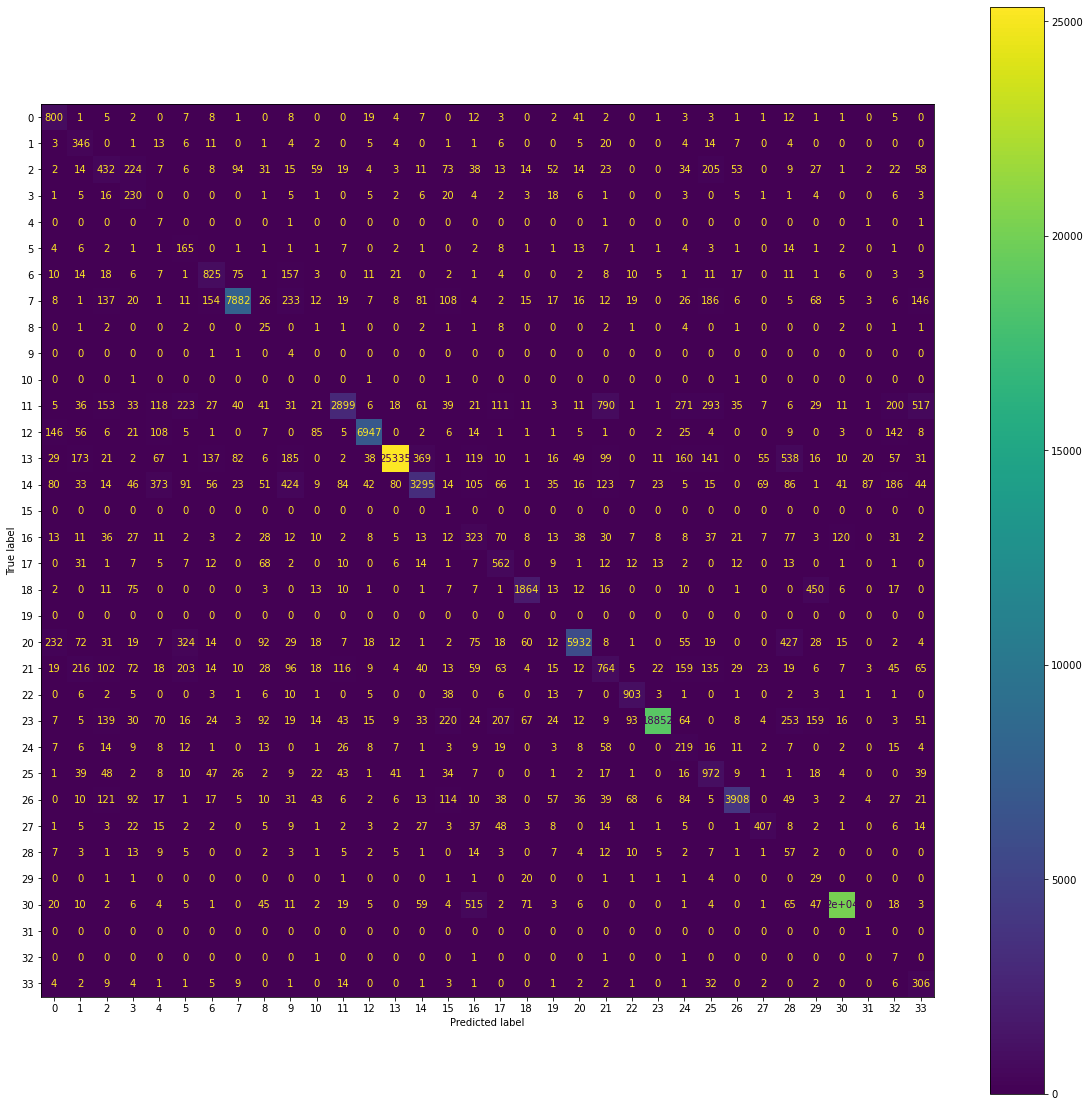

In [498]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

f,ax = plt.subplots(figsize=(20,20))
cm = confusion_matrix(original, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)